# ISLR Ch.04 Classification

## 4.6 Lab

### 4.6.1 The Stock Market Data

In [73]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import preprocessing
from sklearn import neighbors
import sklearn.linear_model as sklm

In [2]:
# 데이터 불러오기
df = pd.read_csv('data/Smarket.csv', usecols=range(1,10), index_col=0, parse_dates=True)
df.describe()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [3]:
# correlation 값 확인
corr = df.corr()
corr

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Lag1,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


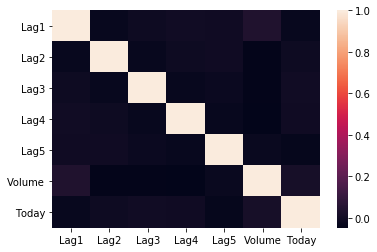

In [4]:
# corr heatmap 그리기
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [5]:
df.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001-01-01,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001-01-01,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001-01-01,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001-01-01,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001-01-01,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


### 4.6.2 Logistic Regression

* 참고자료 :
    * [How formulas Work](https://patsy.readthedocs.io/en/latest/formulas.html)  
    * [endog, exog, what's that](https://www.statsmodels.org/dev/endog_exog.html)

In [6]:
formula = 'Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume'

In [7]:
model = smf.glm(formula=formula, data=df, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Tue, 28 Jul 2020   Deviance:                       1727.6
Time:                                          16:19:44   Pearson chi2:                 1.25e+03
No. Iterations:                                       4   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------

In [8]:
# result params
print("Coeffieients")
print(result.params)
print
print("p-Values")
print(result.pvalues)
print
print("Dependent variables")
print(result.model.endog_names)

Coeffieients
Intercept    0.126000
Lag1         0.073074
Lag2         0.042301
Lag3        -0.011085
Lag4        -0.009359
Lag5        -0.010313
Volume      -0.135441
dtype: float64
p-Values
Intercept    0.600700
Lag1         0.145232
Lag2         0.398352
Lag3         0.824334
Lag4         0.851445
Lag5         0.834998
Volume       0.392404
dtype: float64
Dependent variables
['Direction[Down]', 'Direction[Up]']


result에 predict함수를 통해 예측하고자 하는 값의 확률을 가져올 수 있다.

In [9]:
predictions = result.predict()
print(predictions)

[0.49291587 0.51853212 0.51886117 ... 0.4607317  0.47388171 0.48208344]


In [10]:
result.model.endog

array([0., 0., 1., ..., 0., 1., 1.])

In [11]:
print(np.column_stack((df.as_matrix(columns=["Direction"]).flatten(), result.model.endog)))

[['Up' 0.0]
 ['Up' 0.0]
 ['Down' 1.0]
 ...
 ['Up' 0.0]
 ['Down' 1.0]
 ['Down' 1.0]]


C:\Users\zone\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


예측값 확률(probability of a decrease)중에서 0.5보다 작다면 up으로 예측을 아니라면 down으로 예측하는 벡터를 생성해준다.

In [12]:
predictions_nominal = [ "Up" if x < 0.5 else "Down" for x in predictions]

예측 벡터와 실제값을 통해 confusion matrix를 만들 수 있다

In [13]:
print(confusion_matrix(df["Direction"], predictions_nominal))

[[145 457]
 [141 507]]


정밀도, 재현율, F1점수를 classification report를 통해 구한다.

In [14]:
print(classification_report(df["Direction"], predictions_nominal, digits=3))

              precision    recall  f1-score   support

        Down      0.507     0.241     0.327       602
          Up      0.526     0.782     0.629       648

    accuracy                          0.522      1250
   macro avg      0.516     0.512     0.478      1250
weighted avg      0.517     0.522     0.483      1250



2001~ 2004년 데이터를 train data로 이후의 데이터를 test data로 만들어준다.

In [15]:
x_train = df[:'2004'][:]
y_train = df[:'2004']['Direction']

x_test = df['2005':][:]
y_test = df['2005':]['Direction']

In [16]:
# ~2004년 데이터를 통한 학습
model = smf.glm(formula=formula, data=x_train, family=sm.families.Binomial())
result = model.fit()

이후 test data를 통해 예측값을 구하고 위와 동일하게 예측 벡터를 만든다. 그리고 classification report를 통해 정밀도, 재현율, F1점수를 구한다.

In [17]:
predictions = result.predict(x_test)
predictions_nominal = [ "Up" if x < 0.5 else "Down" for x in predictions]
print(classification_report(y_test, predictions_nominal, digits=3))

              precision    recall  f1-score   support

        Down      0.443     0.694     0.540       111
          Up      0.564     0.312     0.402       141

    accuracy                          0.480       252
   macro avg      0.503     0.503     0.471       252
weighted avg      0.511     0.480     0.463       252



### 4.6.3 Linear Discriminant Analysis

* 참고자료 :
    * [sklearn - LDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

In [18]:
# LDA 분석을 위해 ~2004년 lag1, lag2 칼럼 데이터를 train으로 2005~ 를 test data로 사용
x_train = df[:'2004'][['Lag1','Lag2']]
y_train = df[:'2004']['Direction']

x_test = df['2005':][['Lag1','Lag2']]
y_test = df['2005':]['Direction']

In [19]:
lda = LinearDiscriminantAnalysis()
predictions = lda.fit(x_train, y_train).predict(x_test)

In [20]:
# prior probability (사전 확률)
lda.priors_

array([0.49198397, 0.50801603])

In [21]:
# group means
lda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [22]:
# coefficient of linear descriminants
lda.coef_

array([[-0.05544078, -0.0443452 ]])

In [23]:
# confusion matrix
confusion_matrix(y_test, predictions).T

array([[ 35,  35],
       [ 76, 106]], dtype=int64)

In [24]:
# 정밀도, 재현율, F1 점수
print(classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

        Down      0.500     0.315     0.387       111
          Up      0.582     0.752     0.656       141

    accuracy                          0.560       252
   macro avg      0.541     0.534     0.522       252
weighted avg      0.546     0.560     0.538       252



In [25]:
# 각 클래스에 속할 확률 합하면 1
predict_prob = lda.predict_proba(x_test)
predict_prob

array([[0.49017925, 0.50982075],
       [0.4792185 , 0.5207815 ],
       [0.46681848, 0.53318152],
       [0.47400107, 0.52599893],
       [0.49278766, 0.50721234],
       [0.49385615, 0.50614385],
       [0.49510156, 0.50489844],
       [0.4872861 , 0.5127139 ],
       [0.49070135, 0.50929865],
       [0.48440262, 0.51559738],
       [0.49069628, 0.50930372],
       [0.51199885, 0.48800115],
       [0.48951523, 0.51048477],
       [0.47067612, 0.52932388],
       [0.47445929, 0.52554071],
       [0.47995834, 0.52004166],
       [0.49357753, 0.50642247],
       [0.50308938, 0.49691062],
       [0.49788061, 0.50211939],
       [0.48863309, 0.51136691],
       [0.50065681, 0.49934319],
       [0.51087353, 0.48912647],
       [0.50399248, 0.49600752],
       [0.49163351, 0.50836649],
       [0.50417721, 0.49582279],
       [0.50267505, 0.49732495],
       [0.49140429, 0.50859571],
       [0.48059641, 0.51940359],
       [0.48827181, 0.51172819],
       [0.50621869, 0.49378131],
       [0.

In [26]:
# posterior probabilities(사후 확률)를 통해 각 클래스에 속하는 확률을 알 수 있다.
# 처음과 마찬가지로 마켓이 decrease할 확률을 구하게 되는 것이다.
# 원문 : Notice that the posterior probability output by the model corresponds to the probability that the market will decrease
np.unique(predict_prob[:,1]>0.5, return_counts=True)

(array([False,  True]), array([ 70, 182], dtype=int64))

In [27]:
# 임계값으로 50% 대신 90% 를 사용할 수도 있다.
np.unique(predict_prob[:,1]>0.9, return_counts=True)

(array([False]), array([252], dtype=int64))

### 4.6.4 Quadratic Discriminant Analysis

* 참고자료 :
    * [sklearn - QDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html)

In [29]:
qda = QuadraticDiscriminantAnalysis()
prediction_qda = qda.fit(x_train, y_train).predict(x_test)

In [30]:
# prior probability (사전 확률)
qda.priors_

array([0.49198397, 0.50801603])

In [31]:
# group means
qda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [33]:
# confusion matrix
confusion_matrix(y_test, prediction_qda).T

array([[ 30,  20],
       [ 81, 121]], dtype=int64)

In [34]:
# 정밀도, 재현율, F1 점수
print(classification_report(y_test, prediction_qda, digits=3))

              precision    recall  f1-score   support

        Down      0.600     0.270     0.373       111
          Up      0.599     0.858     0.706       141

    accuracy                          0.599       252
   macro avg      0.600     0.564     0.539       252
weighted avg      0.599     0.599     0.559       252



### 4.6.5 K-Nearest Neighbors

* 참고자료 :
    * [sklearn - kneighborsclassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn-neighbors-kneighborsclassifier)

In [47]:
# 1개 이웃과의 거리로 계산할때 :
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
prediction_knn = knn.fit(x_train, y_train).predict(x_test)

In [48]:
print(classification_report(y_test, prediction_knn, digits=3))

              precision    recall  f1-score   support

        Down      0.426     0.387     0.406       111
          Up      0.550     0.589     0.568       141

    accuracy                          0.500       252
   macro avg      0.488     0.488     0.487       252
weighted avg      0.495     0.500     0.497       252



In [49]:
# 3개 이웃과의 거리로 계산할때 :
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
prediction_knn = knn.fit(x_train, y_train).predict(x_test)

In [50]:
print(classification_report(y_test, prediction_knn, digits=3))

              precision    recall  f1-score   support

        Down      0.466     0.432     0.449       111
          Up      0.577     0.610     0.593       141

    accuracy                          0.532       252
   macro avg      0.522     0.521     0.521       252
weighted avg      0.528     0.532     0.529       252



### 4.6.6 An Application to Caravan Insurance Data

In [51]:
df = pd.read_csv('data/Caravan.csv')

In [52]:
y = df.Purchase
X = df.drop('Purchase', axis=1).astype('float64')
# 데이터 표준화
X_standardize = preprocessing.scale(X)

In [56]:
# 1000~ 는 train으로 ~1000은 test데이터로 사용
X_train = X_standardize[1000:,:]
y_train = y[1000:]
X_test = X_standardize[:1000,:]
y_test = y[:1000]

* KNN - 각 n_neighbors 에 따라

In [62]:
# 1개 이웃과의 거리로 계산할때 :
knn1 = neighbors.KNeighborsClassifier(n_neighbors=1)
prediction_knn1 = knn1.fit(X_train, y_train).predict(X_test)

In [69]:
# confusion matrix
confusion_matrix(y_test, prediction_knn1).T

array([[873,  50],
       [ 68,   9]], dtype=int64)

In [65]:
print(classification_report(y_test, prediction_knn1, digits=3))

              precision    recall  f1-score   support

          No      0.946     0.928     0.937       941
         Yes      0.117     0.153     0.132        59

    accuracy                          0.882      1000
   macro avg      0.531     0.540     0.535      1000
weighted avg      0.897     0.882     0.889      1000



In [63]:
# 3개 이웃과의 거리로 계산할때 :
knn3 = neighbors.KNeighborsClassifier(n_neighbors=3)
prediction_knn3 = knn3.fit(X_train, y_train).predict(X_test)

In [70]:
# confusion matrix
confusion_matrix(y_test, prediction_knn3).T

array([[921,  54],
       [ 20,   5]], dtype=int64)

In [66]:
print(classification_report(y_test, prediction_knn3, digits=3))

              precision    recall  f1-score   support

          No      0.945     0.979     0.961       941
         Yes      0.200     0.085     0.119        59

    accuracy                          0.926      1000
   macro avg      0.572     0.532     0.540      1000
weighted avg      0.901     0.926     0.912      1000



In [64]:
# 5개 이웃과의 거리로 계산할때 :
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5)
prediction_knn5 = knn5.fit(X_train, y_train).predict(X_test)

In [71]:
# confusion matrix
confusion_matrix(y_test, prediction_knn5).T

array([[930,  55],
       [ 11,   4]], dtype=int64)

In [67]:
print(classification_report(y_test, prediction_knn5, digits=3))

              precision    recall  f1-score   support

          No      0.944     0.988     0.966       941
         Yes      0.267     0.068     0.108        59

    accuracy                          0.934      1000
   macro avg      0.605     0.528     0.537      1000
weighted avg      0.904     0.934     0.915      1000



* Logistic Regression

In [74]:
regr = skl_lm.LogisticRegression()
prediction_regr = regr.fit(X_train, y_train).predict(X_test)

C:\Users\zone\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [75]:
# confusion matrix
confusion_matrix(y_test, prediction_regr).T

array([[934,  59],
       [  7,   0]], dtype=int64)

In [77]:
# 임계값 0.25 사용할 경우
predidction_regr_th = regr.predict_proba(X_test)

In [98]:
y_replace = y_test.replace({'No':0,'Yes':1})
y_replace

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
970    0
971    0
972    0
973    0
974    0
975    0
976    0
977    0
978    0
979    0
980    1
981    0
982    0
983    0
984    0
985    0
986    0
987    0
988    0
989    0
990    0
991    0
992    0
993    0
994    0
995    0
996    0
997    0
998    0
999    0
Name: Purchase, Length: 1000, dtype: int64

In [104]:
prediction_ths = (predidction_regr_th[:,1] > 0.25).astype(int)
prediction_ths = pd.Series(prediction_ths)
prediction_ths

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
970    0
971    0
972    0
973    0
974    0
975    0
976    0
977    0
978    0
979    0
980    0
981    0
982    0
983    0
984    0
985    0
986    0
987    0
988    0
989    0
990    0
991    0
992    0
993    0
994    0
995    0
996    0
997    0
998    0
999    0
Length: 1000, dtype: int32

In [105]:
confusion_matrix(y_replace, prediction_ths).T

array([[917,  48],
       [ 24,  11]], dtype=int64)